[INFO] Plotting zero1
(1172, 11)


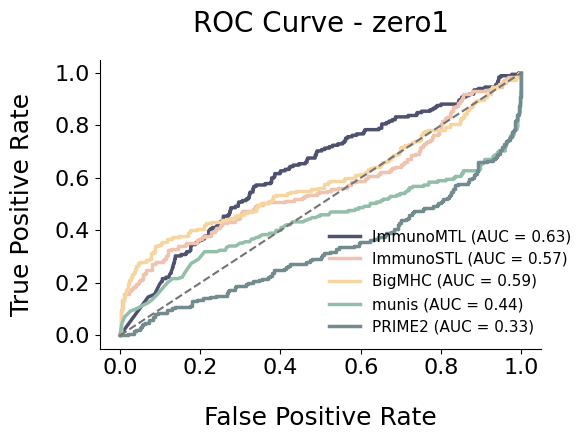

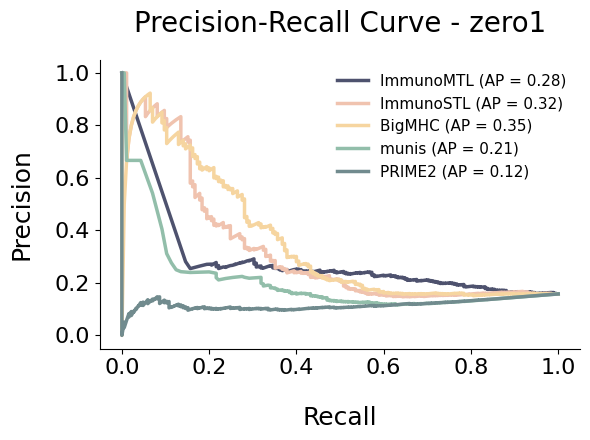

[SAVED] zero1 ROC and PRC curves to ../analysis/figures
[INFO] Plotting zero2
(77, 11)


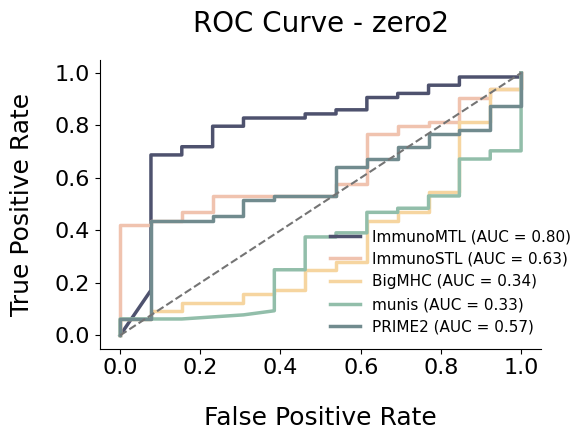

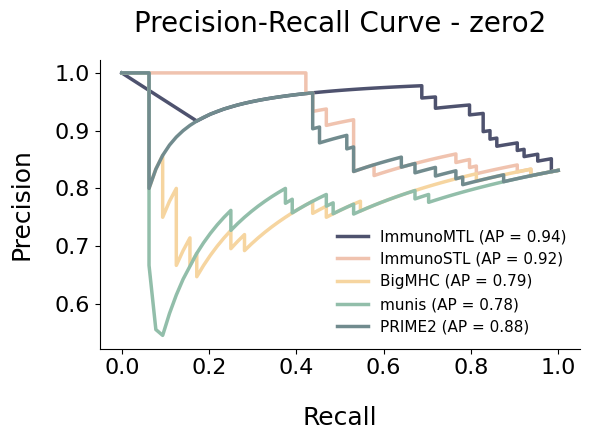

[SAVED] zero2 ROC and PRC curves to ../analysis/figures


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc
plt.rcParams['pdf.fonttype'] = 42

# === CONFIG ===
input_dir = "../analysis/"
output_dir = "../analysis/figures"
os.makedirs(output_dir, exist_ok=True)

datasets = ["zero1", "zero2"]

tool_labels = {
    "ImmunoMTL_score": "ImmunoMTL",
    "immunostl": "ImmunoSTL",
    "BigMHC_IM": "BigMHC",
    "munis": "munis",
    "PRIME_score": "PRIME2",
}

custom_colors = [
    "#4E526E", "#F0C3AF", "#F6D5A0", "#92BEAA", "#718B8E"
]

for dataset in datasets:
    print(f"[INFO] Plotting {dataset}")
    df = pd.read_csv(os.path.join(input_dir, f"{dataset}_pred.csv"))
    print(df.shape)
    # === ROC Curve ===
    plt.figure(figsize=(6, 4.5))
    ax = plt.gca()
    for i, (score_col, label) in enumerate(tool_labels.items()):
        if score_col not in df.columns:
            continue
        df_valid = df[["Label", score_col]].dropna()
        if df_valid.empty:
            continue
        fpr, tpr, _ = roc_curve(df_valid["Label"], df_valid[score_col])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{label} (AUC = {roc_auc:.2f})",
                 color=custom_colors[i % len(custom_colors)], linewidth=2.5)

    plt.plot([0, 1], [0, 1], linestyle='--', color='#747474', linewidth=1.5)
    plt.xlabel("False Positive Rate", fontsize=18, labelpad=20)
    plt.ylabel("True Positive Rate", fontsize=18, labelpad=15)
    plt.title(f"ROC Curve - {dataset}", fontsize=20, pad=20)
    plt.tick_params(axis='both', labelsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend(fontsize=11, loc="lower right", frameon=False, bbox_to_anchor=(1.1, 0))
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{dataset}_roc_comparison.png"), dpi=300, transparent=True)
    plt.savefig(os.path.join(output_dir, f"{dataset}_roc_comparison.pdf"), dpi=300, transparent=True)
    plt.show()
    plt.close()

    # === PRC Curve ===
    plt.figure(figsize=(6, 4.5))
    ax = plt.gca()
    for i, (score_col, label) in enumerate(tool_labels.items()):
        if score_col not in df.columns:
            continue
        df_valid = df[["Label", score_col]].dropna()
        if df_valid.empty:
            continue
        precision, recall, _ = precision_recall_curve(df_valid["Label"], df_valid[score_col])
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{label} (AP = {pr_auc:.2f})",
                 color=custom_colors[i % len(custom_colors)], linewidth=2.5)

    plt.xlabel("Recall", fontsize=18, labelpad=20)
    plt.ylabel("Precision", fontsize=18, labelpad=15)
    plt.title(f"Precision-Recall Curve - {dataset}", fontsize=20, pad=20)
    plt.tick_params(axis='both', labelsize=16)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    if dataset == "zero2":
        plt.legend(fontsize=11, loc="lower right", frameon=False)
    else:
        plt.legend(fontsize=11, loc="upper right", frameon=False)
    plt.tight_layout()
    
    plt.savefig(os.path.join(output_dir, f"{dataset}_prc_comparison.png"), dpi=300, transparent=True)
    plt.savefig(os.path.join(output_dir, f"{dataset}_prc_comparison.pdf"), dpi=300, transparent=True)
    plt.show()
    plt.close()

    print(f"[SAVED] {dataset} ROC and PRC curves to {output_dir}")